## Getting a grip on minor allele frequenecs for multiallelic data

I want to better understand the distribution of frequencies of minor alleles.

Specific things to explore:
- average number of reads per locus in individual
- for loci with two or more alleles in an individual, frequency of minor alleles

In [1]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2


In [2]:
ind_all = open("FG001.alleles.tsv", "r")
lines = ind_all.readlines()[1:] # get rid of header

biglist_for_array = []
for line in lines:
    linelist = line.strip().split()[2:] # exclude first two columns, not useful info
    biglist_for_array.append(linelist) # make list of lists for array

In [3]:
import numpy as np

In [4]:
r = np.array(biglist_for_array) # convert to array
print r[0:9,] # check

[['6' 'A' '30.00' '3']
 ['6' 'C' '70.00' '7']
 ['13' 'C' '45.66' '205']
 ['13' 'T' '54.34' '244']
 ['18' 'CCA' '34.76' '65']
 ['18' 'TTA' '0.53' '1']
 ['18' 'TTG' '64.71' '121']
 ['21' 'A' '57.02' '134']
 ['21' 'C' '42.55' '100']]


## Find out how many alleles possible per genotype in this individual

In [6]:
all_locus_names = [] # get locus names, incl redundant
for row in r:
    locus_name = row[0]
    all_locus_names.append(locus_name)
    
unique_locus_names = [] # just unique locus names in order
for name in all_locus_names:
    if name not in unique_locus_names:
        unique_locus_names.append(name) 
print unique_locus_names[0:9] # print first few to check

num_loci = len(unique_locus_names)
print "\nYour file has " + str(num_loci) + " loci." # report num loci

['6', '13', '18', '21', '32', '35', '41', '42', '54']

Your file has 4958 loci.


In [7]:
print all_locus_names[0:14]

['6', '6', '13', '13', '18', '18', '18', '21', '21', '32', '32', '35', '35', '41']


In [8]:
index_list = []
for locus in unique_locus_names:
    indeces = [i for i, x in enumerate(all_locus_names) if x == locus]
    index_list.append(indeces)

list_arrays_bytag = []
for indeces in index_list:
    miniarray = r[indeces]
    list_arrays_bytag.append(miniarray)

print list_arrays_bytag[0]

[['6' 'A' '30.00' '3']
 ['6' 'C' '70.00' '7']]


In [9]:
allele_counts = []
for array in list_arrays_bytag:
    count = array.shape[0]
    allele_counts.append(count)

print allele_counts[0:19]

[2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2]


## Histogram of allele counts within individual

In [ ]:
import matplotlib.pyplot as plt

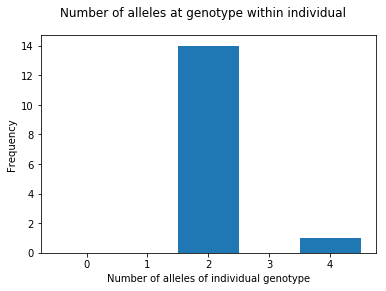

In [62]:
plt.hist(allele_counts, bins=np.arange(6)-0.5)
plt.xticks(range(5))
plt.suptitle("Number of alleles at genotype within individual")
plt.xlabel("Number of alleles of individual genotype")
plt.ylabel("Frequency")
plt.show()